In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from scipy import stats

# Chi$^2$ ($\chi^2$) Test for Independence

aka Pearson's Chi$^2$ test. Pronounced as 'Ki' as in kite.

- Lets us test the hypothesis that one group is independent of another
- $H_0$ is always that there is independence between the groups
- $H_0$ is that there is no dependence


The null hypothesis assumes that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable

## The Quick Way To Run a Chi$^2$ Test

In [3]:
# get data from pydataset
df = data('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


- $H_0$ There is independence between the smoker and time of the
day
- $H_a$ is that there is a dependence

In [7]:
# Crosstab 
observed = pd.crosstab(df.time, df.smoker, margins = True)
observed


smoker,No,Yes,All
time,,,
Dinner,106,70,176
Lunch,45,23,68
All,151,93,244


In [10]:
observed = pd.crosstab(df.time, df.smoker, margins = True, normalize = 'columns')
observed

smoker,No,Yes,All
time,,,
Dinner,0.701987,0.752688,0.721311
Lunch,0.298013,0.247312,0.278689


In [11]:
# pandas crosstab to make a 'contingency' table
observed = pd.crosstab(df.time, df.smoker)
observed

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


In [12]:
# Set our alpha
alpha = .01

In [13]:
# chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [14]:
chi2, p, degf, expected

(0.5053733928754355,
 0.4771485672079724,
 1,
 array([[108.91803279,  67.08196721],
        [ 42.08196721,  25.91803279]]))

In [15]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


## Attrition Data

In [16]:
# get your data
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

In [17]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [18]:
# check shape of the dataframe
df.shape

(1470, 35)

In [19]:
# Check for which columns are discrete
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# Question we want to answer:

# 1. Is Attrition independent from Business Travel amount?
# 2. Is Attrition independent from Department?
# 3. Is Attrition indpendent from WorkLife balance

In [21]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Form hypothesis:

$H_0$: Attrition and Travel Frequency are independent (not dependent)

$H_a$: Attrition and Travel Frequency are dependent

In [22]:
# cross tab Attrition vs Business Travel
observed = pd.crosstab(df.Attrition, df.BusinessTravel)

In [24]:
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


In [ ]:
# Set our alpha
alpha = .01

In [25]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [26]:
chi2, p, degf

(24.182413685655174, 5.608614476449931e-06, 2)

In [27]:
expected 

array([[125.81632653, 232.34081633, 874.84285714],
       [ 24.18367347,  44.65918367, 168.15714286]])

In [28]:
null_hypothesis = "Attrition and Business Travel are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that Attrition and Business Travel are independent
5.608614476449931e-06


In [29]:
#Normalized crosstab
observed = pd.crosstab(df.Attrition, df.BusinessTravel, normalize = True)
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,0.093878,0.141497,0.603401
Yes,0.008163,0.046939,0.106122


<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

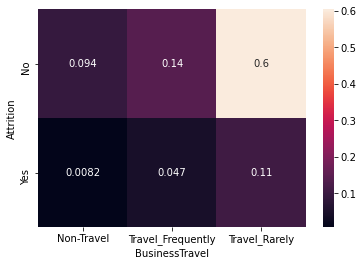

In [31]:
# make a heatmap
sns.heatmap(observed, annot = True)

## Let's Test for Independence of Attrition and Deparment
- $H_0$: There is no relationship between them, Attrition and Deparment are independent
- $H_a$: There is a relationship

In [32]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [33]:
#crosstab for observed values between Attrition and Depts
observed = pd.crosstab(df.Attrition, df.Department)
observed

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [34]:
# Let's get the p value from a chi2 test for independence
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [35]:
chi2, p, degf, expected

(10.79600732241067,
 0.004525606574479633,
 2,
 array([[ 52.84285714, 806.06326531, 374.09387755],
        [ 10.15714286, 154.93673469,  71.90612245]]))

In [36]:
if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

We reject the null


In [ ]:
# Is attrition and being in sales related?

In [37]:
df["in_sales"] = df.Department == "Sales"

In [38]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,in_sales
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,False


In [39]:
# crosstab between Attrition and in_sales column
observed = pd.crosstab(df.Attrition, df.in_sales)
observed

in_sales,False,True
Attrition,,
No,879,354
Yes,145,92


#### $H_0$: Attrition and Being in Sales or Not are independent
#### $H_a$: There is a relationship

In [40]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

p

We reject the null


0.0025036788527795267

## Let's test for independence between WorkLifeBalance and Attrition
- $H_0$: WorkLifeBalance and Attrition are independent, no relationship
- $H_a$: They are dependent - there is a relationship

WorkLifeBalance   
1 'Bad'  
2 'Good'  
3 'Better'  
4 'Best'  

In [41]:
#look at value counts
df.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [42]:
# Crosstab for Attrition and WorklifeBalance
observed = pd.crosstab(df.Attrition, df.WorkLifeBalance)

In [43]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We reject the null hypothesis


In [44]:
p

0.0009725698845348824

In [ ]:
# Now, let's control for Department

In [45]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [47]:
# make new dataframes for each dept
r_n_d = df[df.Department == 'Research & Development']
sales = df[df.Department == 'Sales']
hr = df[df.Department == 'Human Resources']


In [49]:
r_n_d.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,in_sales
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,False
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,False


In [52]:
# Run the chi squared test for independence on only RND
observed = pd.crosstab(r_n_d.Attrition, r_n_d.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,41,203,507,77
Yes,19,32,68,14


In [53]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We reject the null hypothesis


0.0004119601633396577

In [54]:
# how about for sales?
observed = pd.crosstab(sales.Attrition, sales.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,10,78,226,40
Yes,6,24,50,12


In [55]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.20695513054029363

In [56]:
expected

array([[ 12.69955157,  80.95964126, 219.06726457,  41.2735426 ],
       [  3.30044843,  21.04035874,  56.93273543,  10.7264574 ]])

In [57]:
# How about for HR?
observed = pd.crosstab(hr.Attrition, hr.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,4,5,33,9
Yes,0,2,9,1


In [58]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.5645088718158451

## Findings So Far:
$H_0$ is that there is no relationship. Worklife and Attrition are indpendent

- Research and Development, we reject the null hypothesis
- Sales, we fail to reject the null. This could be due to small population size.
- HR, we fail to reject the null. This could be due to small population size